In [5]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def barplot(experiments, experiment_names, category):
    if category == 'GLOPs':
        category_label = 'GFLOPs'
    else:
        category_label = category

    colors = ['red', 'blue', 'purple', 'green', 'yellow', 'orange', 'black']
    bar_width = 0.1

    assert len(experiments) == len(experiment_names)
    assert len(experiments) <= len(colors)

    layer_names = ['Layer {}'.format(i + 1) for i in range(len(experiments[0]))]

    values = []
    for _ in range(len(experiments)):
        values.append([])

    # values is `experiments` long
    for e, exp in enumerate(experiments):
        for layer_stats in exp:
            values[e].append(layer_stats[category])

    rs = [np.arange(len(layer_names))]
    for i in range(1, len(layer_names)):
        rs.append([x + bar_width for x in rs[i-1]])
            
    plt.figure(figsize=(15, 10))

    for e in range(len(experiments)):
        plt.bar(rs[e], values[e], color=colors[e], width=bar_width, edgecolor='black', label=experiment_names[e])

    plt.xticks([r + bar_width for r in range(len(layer_names))], layer_names)
    plt.ylabel(category_label)

    plt.legend()

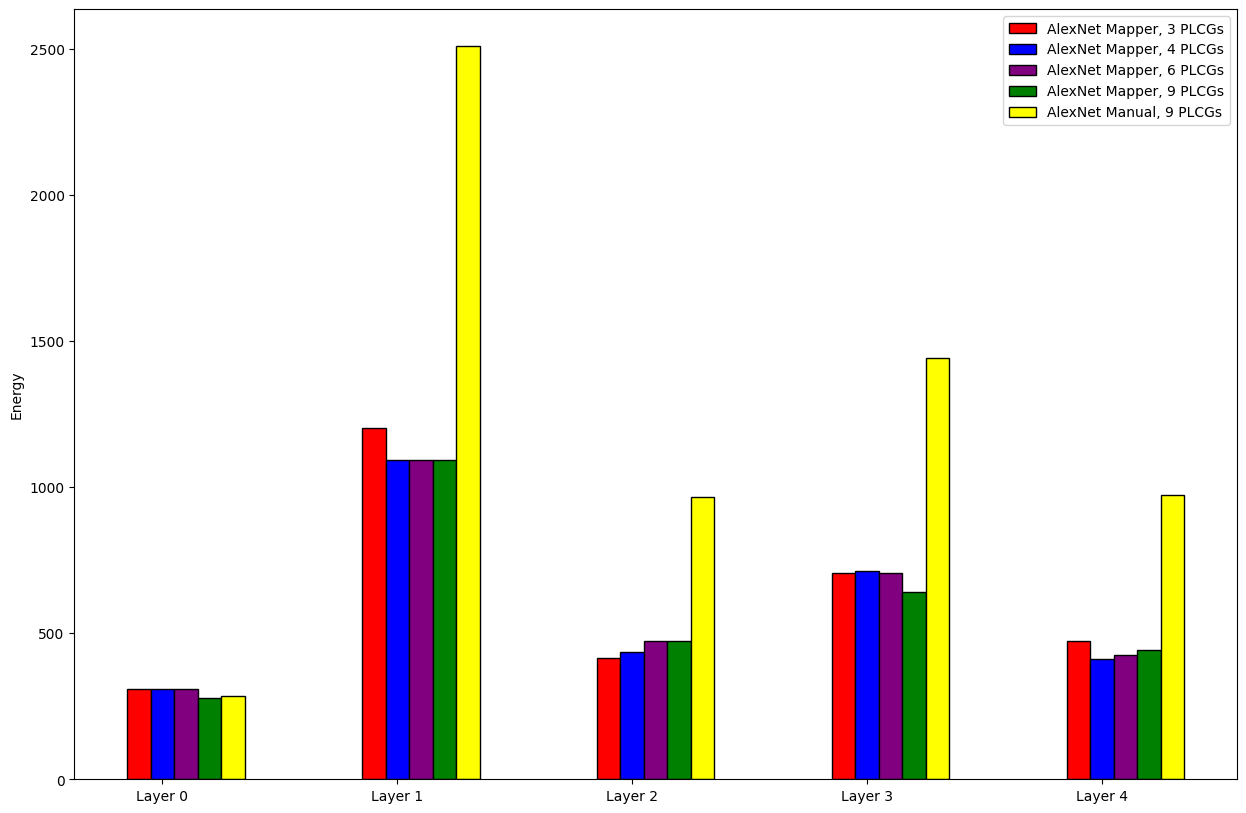

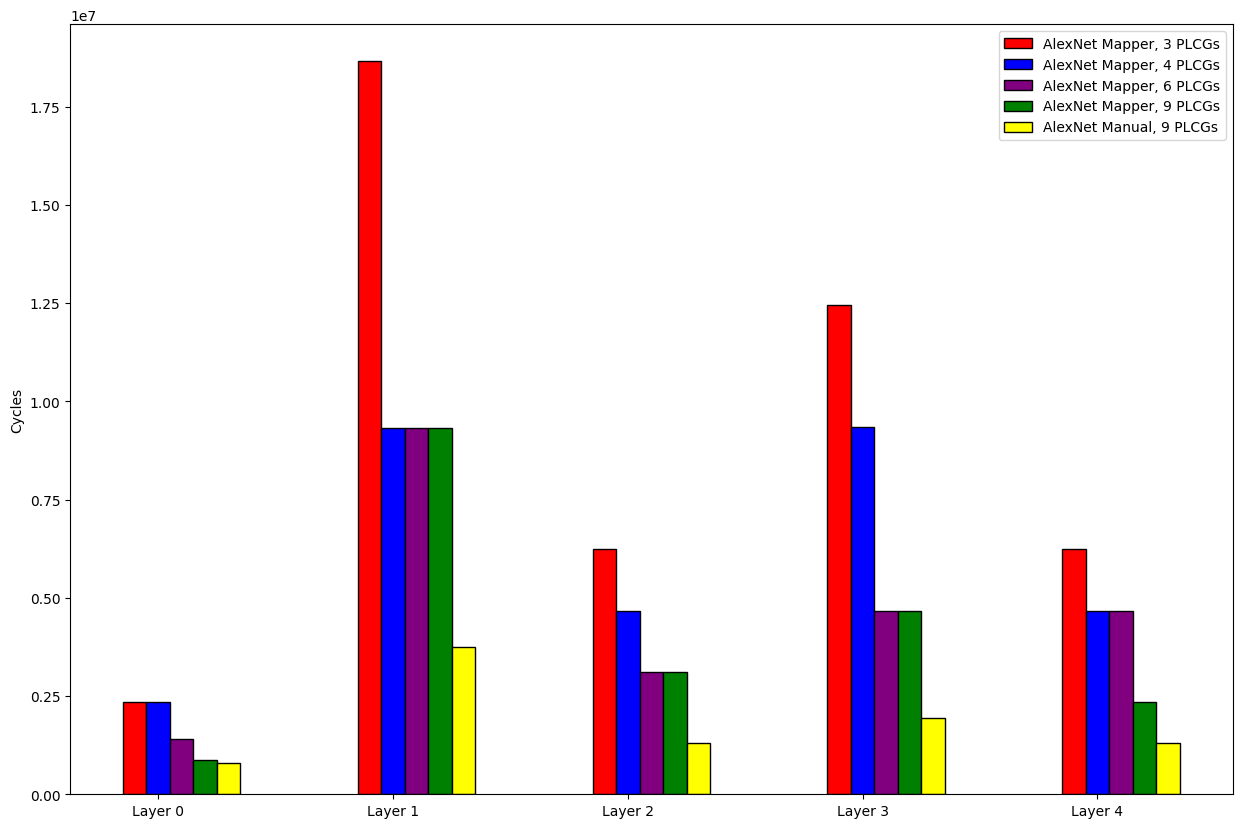

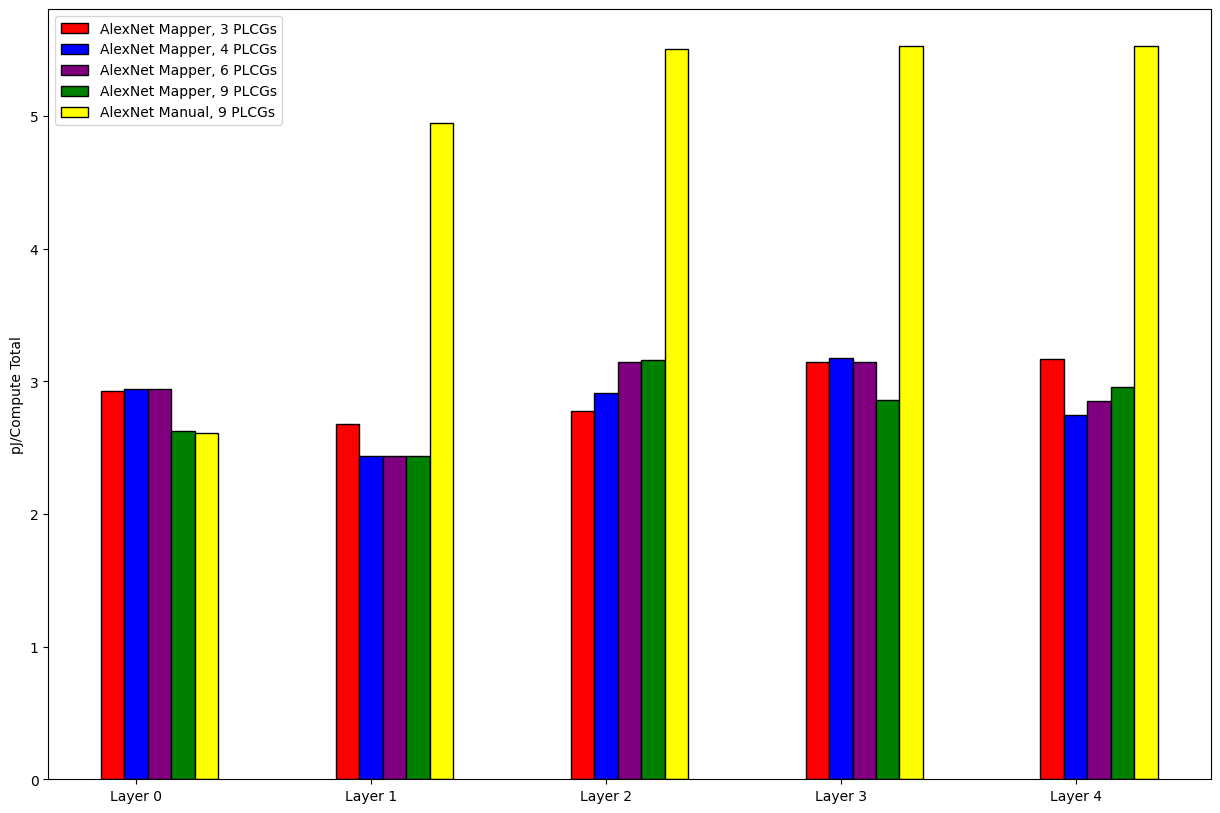

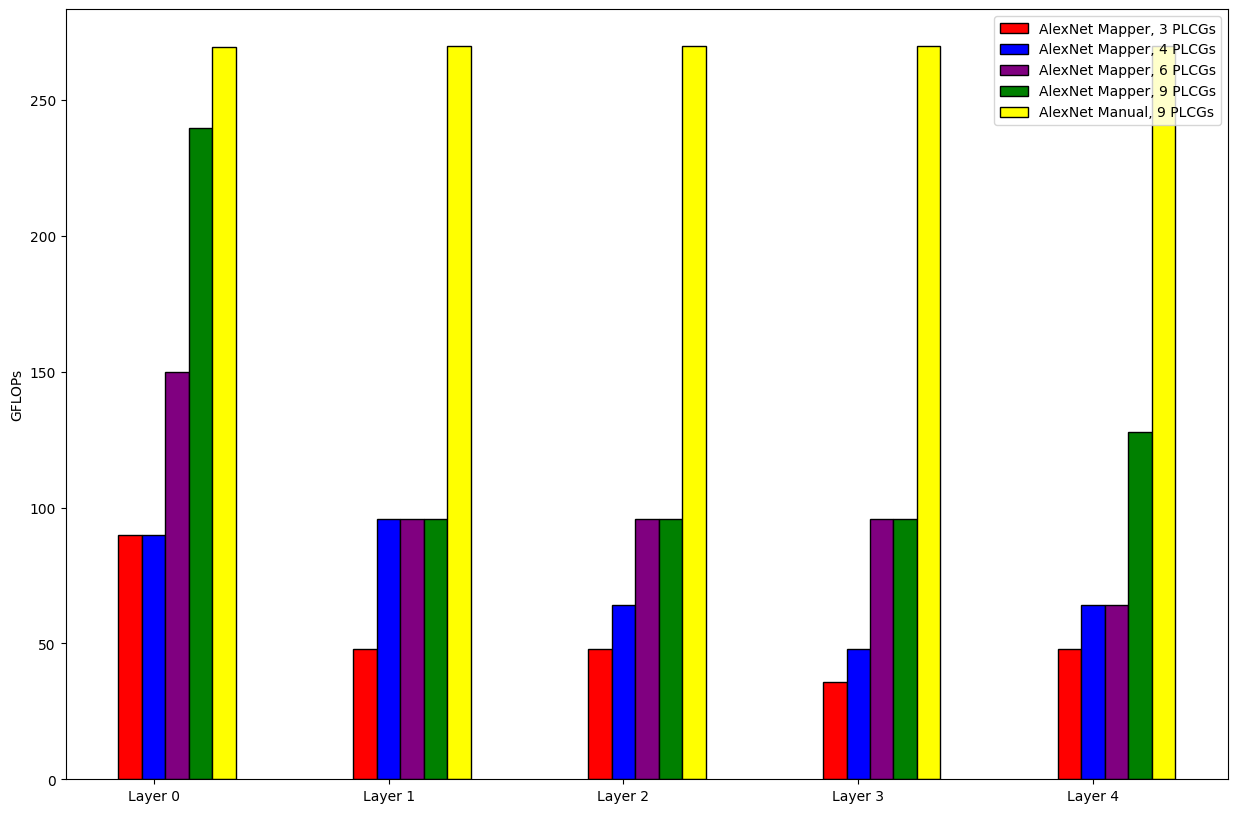

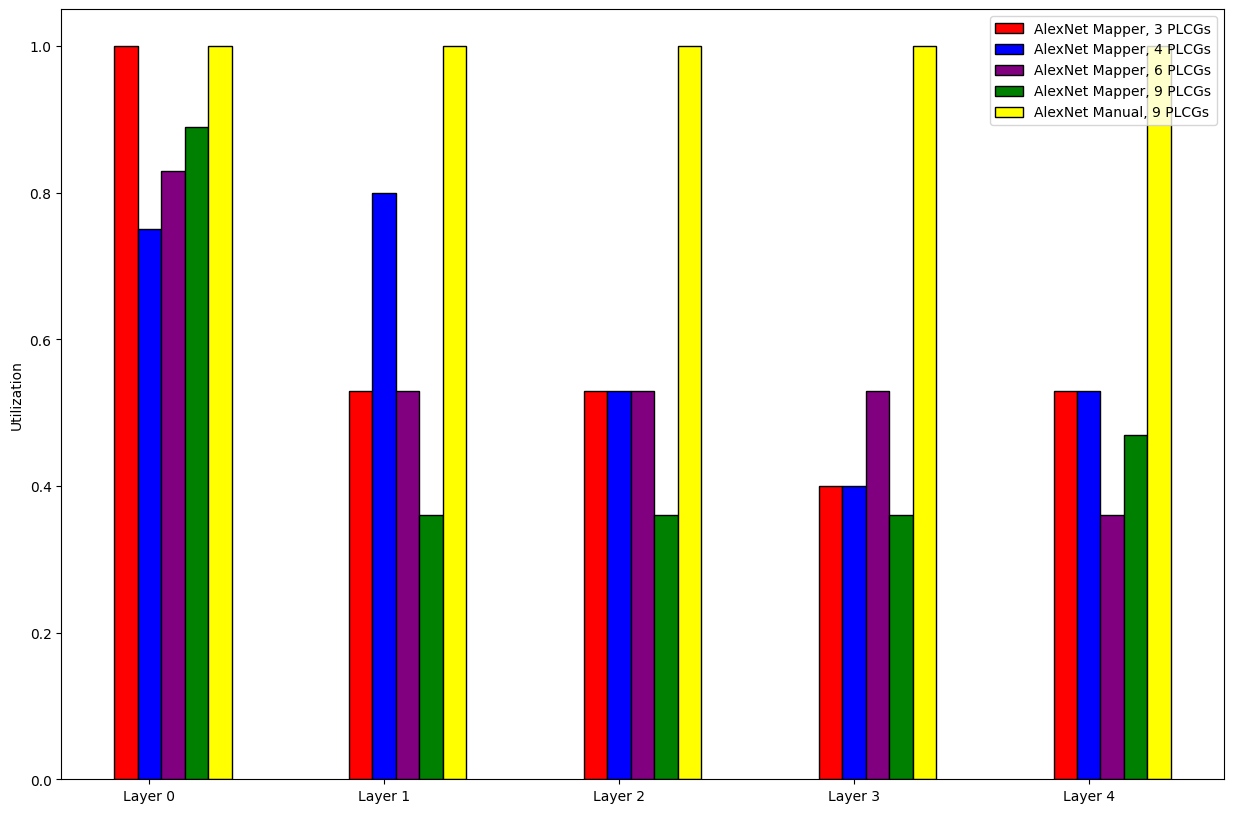

In [3]:
alexnet_mapper_3 = load_data('../results/alexnet/mapper/3/stats.pkl')
alexnet_mapper_4 = load_data('../results/alexnet/mapper/4/stats.pkl')
alexnet_mapper_6 = load_data('../results/alexnet/mapper/6/stats.pkl')
alexnet_mapper_9 = load_data('../results/alexnet/mapper/9/stats.pkl')
alexnet_manual_9 = load_data('../results/alexnet/manual/9/stats.pkl')

experiments = [alexnet_mapper_3, alexnet_mapper_4, alexnet_mapper_6, alexnet_mapper_9, alexnet_manual_9]
experiment_names = ['AlexNet Mapper, 3 PLCGs', 'AlexNet Mapper, 4 PLCGs', 'AlexNet Mapper, 6 PLCGs', 'AlexNet Mapper, 9 PLCGs', 'AlexNet Manual, 9 PLCGs']
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for category in categories:
    barplot(experiments, experiment_names, category)

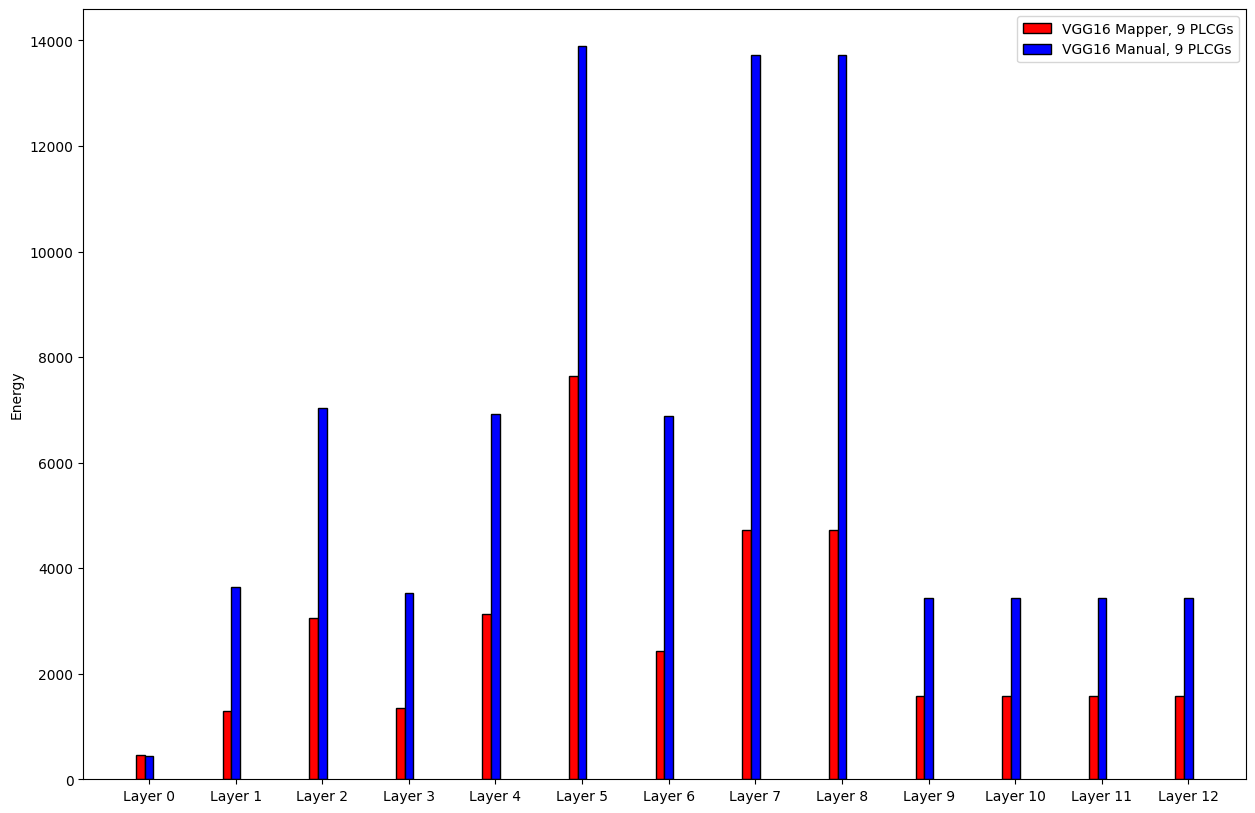

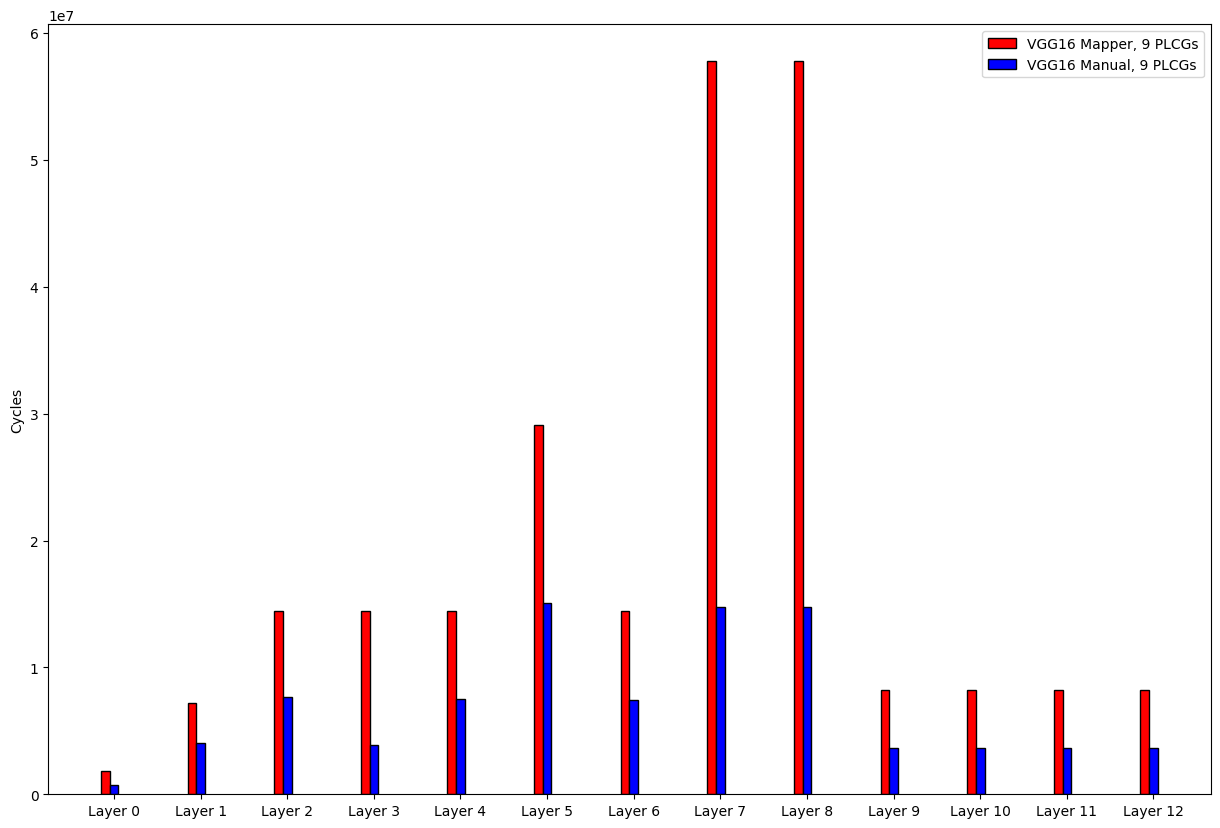

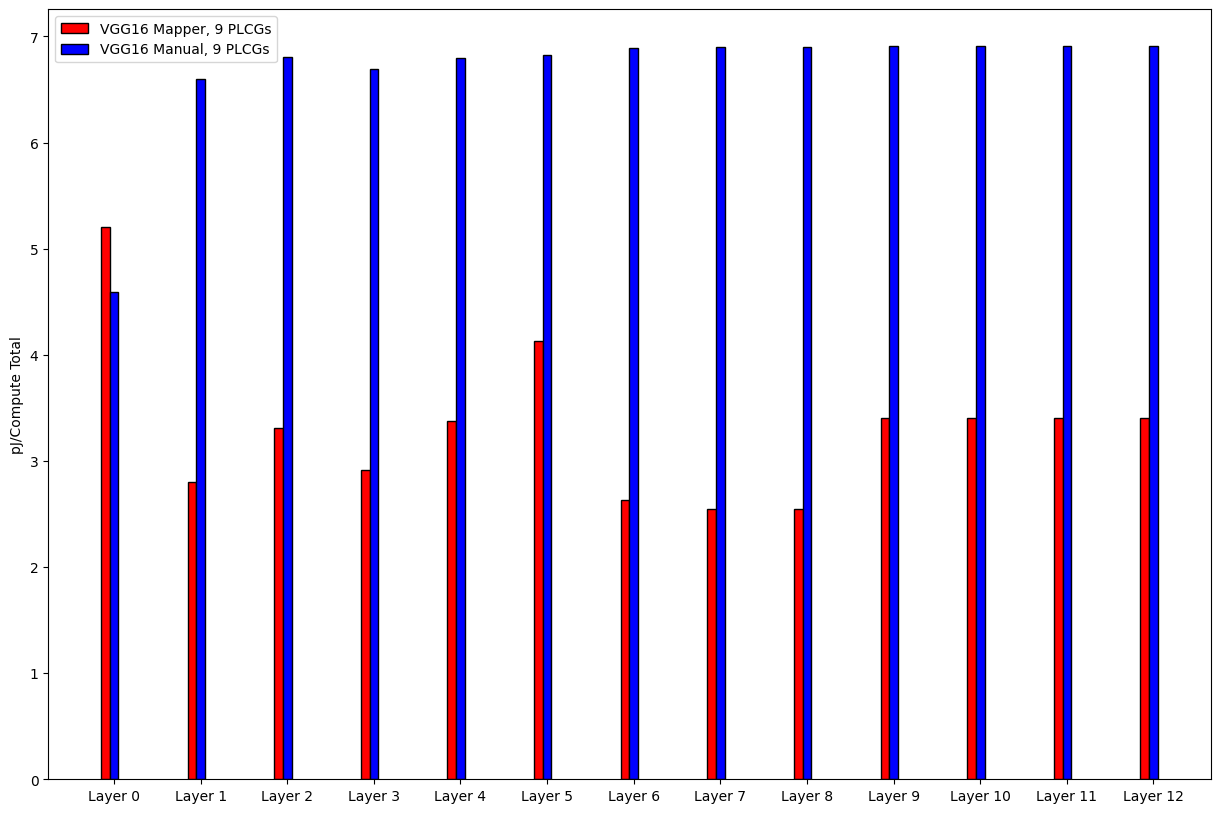

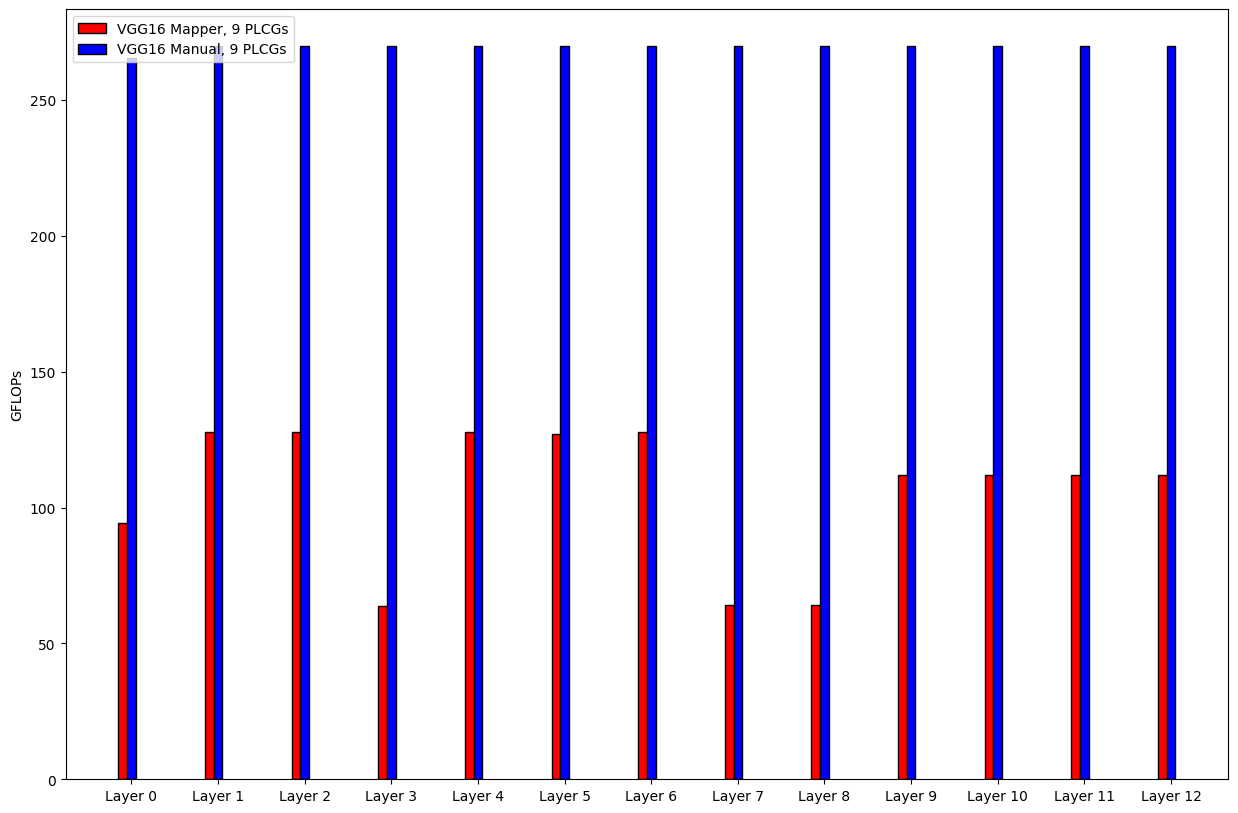

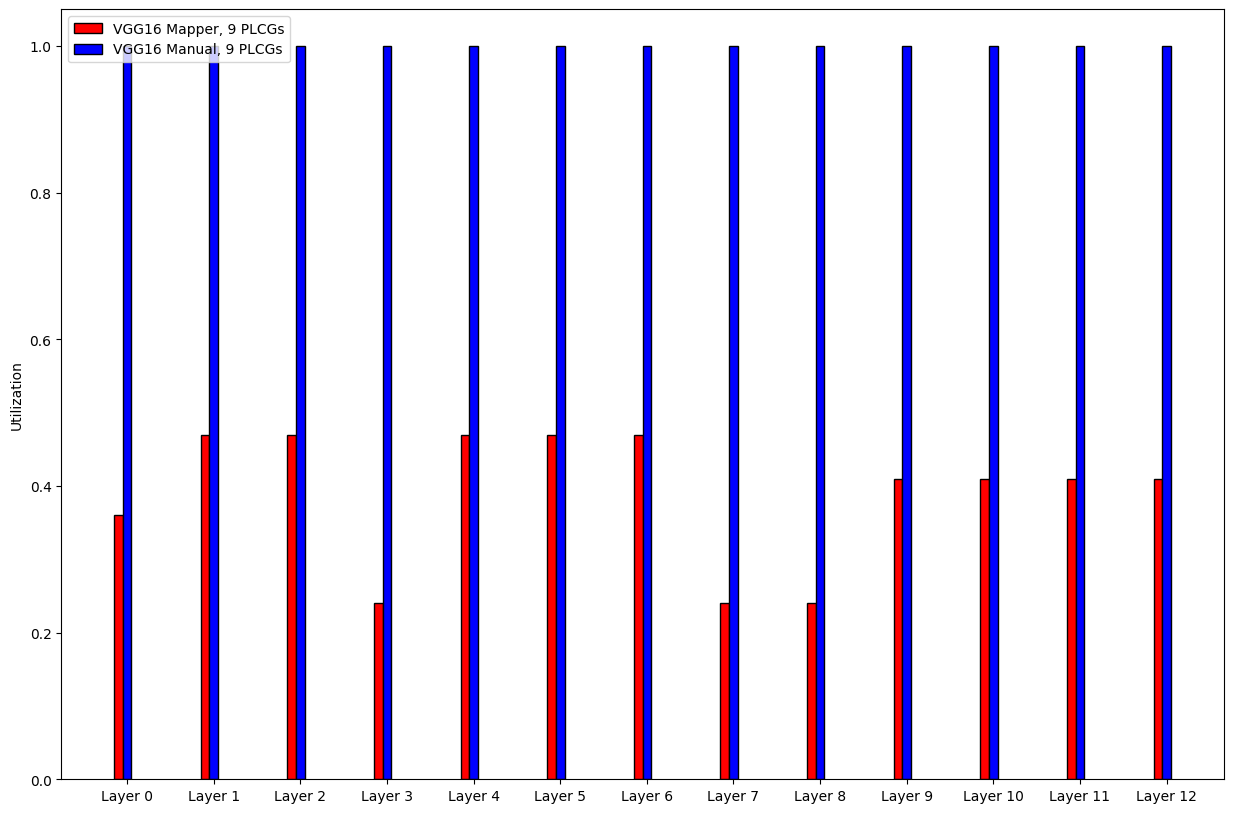

In [4]:
vgg16_mapper_9 = load_data('../results/vgg16/mapper/9/stats.pkl')
vgg16_manual_9 = load_data('../results/vgg16/manual/9/stats.pkl')

experiments = [vgg16_mapper_9, vgg16_manual_9]
experiment_names = ['VGG16 Mapper, 9 PLCGs', 'VGG16 Manual, 9 PLCGs']
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for category in categories:
    barplot(experiments, experiment_names, category)